# Reading Dataset

In [61]:

import pandas as pd
df = pd.read_csv("diabetes_dataset.csv")

In [62]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'],
      dtype='object')

In [63]:
df['Outcome'] = ((df['HbA1c'] >= 6.5) | (df['Fasting_Blood_Glucose'] >= 126)).astype(int)

In [64]:
df['Sex'] = df['Sex'].str.strip().str.capitalize()  # clean it first
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

# Checking the column is in string format and remove any unwanted whitespaces

In [65]:
df['Smoking_Status'] = df['Smoking_Status'].astype(str).str.strip().str.capitalize()

print(df['Smoking_Status'].unique())

df = pd.get_dummies(df, dtype = int , columns=['Smoking_Status'], prefix='Smoke', drop_first=True)


['Never' 'Current' 'Former']


In [66]:
df['Alcohol_Consumption'].value_counts()

Alcohol_Consumption
Moderate    3373
Heavy       3307
Name: count, dtype: int64

# Checking any missing values in the dataset....

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  int64  
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

# Filling the missing values with mode of that column

In [68]:
mode_value = df['Alcohol_Consumption'].mode()[0]
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].fillna(mode_value)

In [69]:
df = pd.get_dummies(df, columns=['Alcohol_Consumption'], dtype=int , prefix='Alcohol', drop_first=True)


In [70]:
df = pd.get_dummies(df, columns=['Physical_Activity_Level'], prefix='Physical_Activity', dtype=int , drop_first=True)

In [71]:
df = df.drop(columns=['Unnamed: 0', 'Ethnicity'])

# Labeling different age groups

In [72]:
import pandas as pd
age_bins = [0, 25, 45, 65, 100]
age_labels = ['Young', 'Middle-Aged', 'Older', 'Senior'] 

df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)



In [73]:
df

,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,...,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Outcome,Smoke_Former,Smoke_Never,Alcohol_Moderate,Physical_Activity_Low,Physical_Activity_Moderate,Age_Group
0,58,0,35.8,83.4,123.9,10.9,152,114,197.8,50.2,...,1538,0,1,1,0,1,1,0,1,Older
1,48,1,24.1,71.4,183.7,12.8,103,91,261.6,62.0,...,2653,0,1,1,0,0,1,0,1,Older
2,34,0,25.0,113.8,142.0,14.5,179,104,261.0,32.1,...,1684,1,0,1,1,0,0,1,0,Middle-Aged
3,62,1,32.7,100.4,167.4,8.8,176,118,183.4,41.1,...,3796,1,0,1,0,1,1,1,0,Older
4,27,0,33.5,110.8,146.4,7.1,122,97,203.2,53.9,...,3161,0,0,1,0,0,0,0,1,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45,0,39.4,114.0,76.2,13.4,109,82,187.7,60.3,...,3582,1,1,1,1,0,1,1,0,Middle-Aged
9996,41,0,21.0,71.3,77.1,12.9,154,72,234.3,72.3,...,2206,1,1,1,0,1,1,1,0,Middle-Aged
9997,50,0,29.0,106.3,97.5,4.9,122,61,266.0,69.8,...,3175,1,1,0,1,0,0,0,0,Older
9998,62,0,27.3,119.9,89.0,11.5,99,115,172.3,74.2,...,3478,1,0,1,0,1,1,0,0,Older


In [74]:
df['Blood_Pressure_Systolic'].max()

179

In [75]:
df.columns

Index(['Age', 'Sex', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose',
       'HbA1c', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT',
       'Serum_Urate', 'Dietary_Intake_Calories', 'Family_History_of_Diabetes',
       'Previous_Gestational_Diabetes', 'Outcome', 'Smoke_Former',
       'Smoke_Never', 'Alcohol_Moderate', 'Physical_Activity_Low',
       'Physical_Activity_Moderate', 'Age_Group'],
      dtype='object')

In [76]:
df = pd.get_dummies(df, dtype = int , columns=['Age_Group'], prefix='Age', drop_first=True)


In [77]:
df.drop(columns=['Age'])

,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,...,Previous_Gestational_Diabetes,Outcome,Smoke_Former,Smoke_Never,Alcohol_Moderate,Physical_Activity_Low,Physical_Activity_Moderate,Age_Middle-Aged,Age_Older,Age_Senior
0,0,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,...,1,1,0,1,1,0,1,0,1,0
1,1,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,...,1,1,0,0,1,0,1,0,1,0
2,0,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,...,0,1,1,0,0,1,0,1,0,0
3,1,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,...,0,1,0,1,1,1,0,0,1,0
4,0,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,39.4,114.0,76.2,13.4,109,82,187.7,60.3,88.7,...,1,1,1,0,1,1,0,1,0,0
9996,0,21.0,71.3,77.1,12.9,154,72,234.3,72.3,200.0,...,1,1,0,1,1,1,0,1,0,0
9997,0,29.0,106.3,97.5,4.9,122,61,266.0,69.8,156.1,...,1,0,1,0,0,0,0,0,1,0
9998,0,27.3,119.9,89.0,11.5,99,115,172.3,74.2,110.9,...,0,1,0,1,1,0,0,0,1,0


In [78]:
df

,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,...,Previous_Gestational_Diabetes,Outcome,Smoke_Former,Smoke_Never,Alcohol_Moderate,Physical_Activity_Low,Physical_Activity_Moderate,Age_Middle-Aged,Age_Older,Age_Senior
0,58,0,35.8,83.4,123.9,10.9,152,114,197.8,50.2,...,1,1,0,1,1,0,1,0,1,0
1,48,1,24.1,71.4,183.7,12.8,103,91,261.6,62.0,...,1,1,0,0,1,0,1,0,1,0
2,34,0,25.0,113.8,142.0,14.5,179,104,261.0,32.1,...,0,1,1,0,0,1,0,1,0,0
3,62,1,32.7,100.4,167.4,8.8,176,118,183.4,41.1,...,0,1,0,1,1,1,0,0,1,0
4,27,0,33.5,110.8,146.4,7.1,122,97,203.2,53.9,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45,0,39.4,114.0,76.2,13.4,109,82,187.7,60.3,...,1,1,1,0,1,1,0,1,0,0
9996,41,0,21.0,71.3,77.1,12.9,154,72,234.3,72.3,...,1,1,0,1,1,1,0,1,0,0
9997,50,0,29.0,106.3,97.5,4.9,122,61,266.0,69.8,...,1,0,1,0,0,0,0,0,1,0
9998,62,0,27.3,119.9,89.0,11.5,99,115,172.3,74.2,...,0,1,0,1,1,0,0,0,1,0


In [79]:
df.drop(columns=['Age'] , inplace = True)

# Dividing dataset for model train and test

In [80]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1) 
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")



Training data shape: (8000, 23)
Testing data shape: (2000, 23)


# Using Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg_model = LogisticRegression(random_state=42)

log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 95.20%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       181
           1       0.97      0.98      0.97      1819

    accuracy                           0.95      2000
   macro avg       0.86      0.83      0.85      2000
weighted avg       0.95      0.95      0.95      2000


Confusion Matrix:
[[ 124   57]
 [  39 1780]]


C:\Users\Mi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Performing standard scaling..

In [82]:
#performing standard scaling...........................

from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    'BMI',
    'Waist_Circumference',
    'Fasting_Blood_Glucose',
    'HbA1c',
    'Cholesterol_HDL',
    'Serum_Urate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Cholesterol_Total',
    'Dietary_Intake_Calories'
]

scaler = StandardScaler()


df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [83]:
df.columns

Index(['Sex', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT',
       'Serum_Urate', 'Dietary_Intake_Calories', 'Family_History_of_Diabetes',
       'Previous_Gestational_Diabetes', 'Outcome', 'Smoke_Former',
       'Smoke_Never', 'Alcohol_Moderate', 'Physical_Activity_Low',
       'Physical_Activity_Moderate', 'Age_Middle-Aged', 'Age_Older',
       'Age_Senior'],
      dtype='object')

# Test Train Split

In [84]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1) 
y = df['Outcome']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")



Training data shape: (8000, 23)
Testing data shape: (2000, 23)


# Naive Byes Algorithm

In [85]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

y_pred_gnb = gnb_model.predict(X_test)

print(f"Gaussian Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_gnb) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))

Gaussian Naive Bayes Accuracy: 98.65%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       181
           1       0.99      1.00      0.99      1819

    accuracy                           0.99      2000
   macro avg       0.99      0.93      0.96      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix:
[[ 154   27]
 [   0 1819]]


# Logistic Regression after standard scaling

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg_model = LogisticRegression(random_state=42)

log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 95.85%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       181
           1       0.98      0.98      0.98      1819

    accuracy                           0.96      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.96      0.96      0.96      2000


Confusion Matrix:
[[ 139   42]
 [  41 1778]]


C:\Users\Mi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# QDA

In [87]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

y_pred_qda = qda_model.predict(X_test)

print(f"QDA Accuracy: {accuracy_score(y_test, y_pred_qda) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_qda))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_qda))

QDA Accuracy: 98.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       181
           1       0.98      1.00      0.99      1819

    accuracy                           0.98      2000
   macro avg       0.97      0.92      0.94      2000
weighted avg       0.98      0.98      0.98      2000


Confusion Matrix:
[[ 153   28]
 [   7 1812]]


# xgBoost

In [88]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(f"XGBoost Classifier Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classifier Accuracy: 99.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       181
           1       1.00      1.00      1.00      1819

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
[[ 181    0]
 [   1 1818]]


C:\Users\Mi\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [13:38:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 90.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11       181
           1       0.91      0.99      0.95      1819

    accuracy                           0.91      2000
   macro avg       0.71      0.53      0.53      2000
weighted avg       0.88      0.91      0.88      2000


Confusion Matrix:
[[  11  170]
 [  11 1808]]


# SVM

In [90]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)  # You can also try 'rbf', 'poly', or 'sigmoid'
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print(f"SVM Classifier Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Classifier Accuracy: 96.70%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       181
           1       0.98      0.98      0.98      1819

    accuracy                           0.97      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.97      0.97      0.97      2000


Confusion Matrix:
[[ 145   36]
 [  30 1789]]


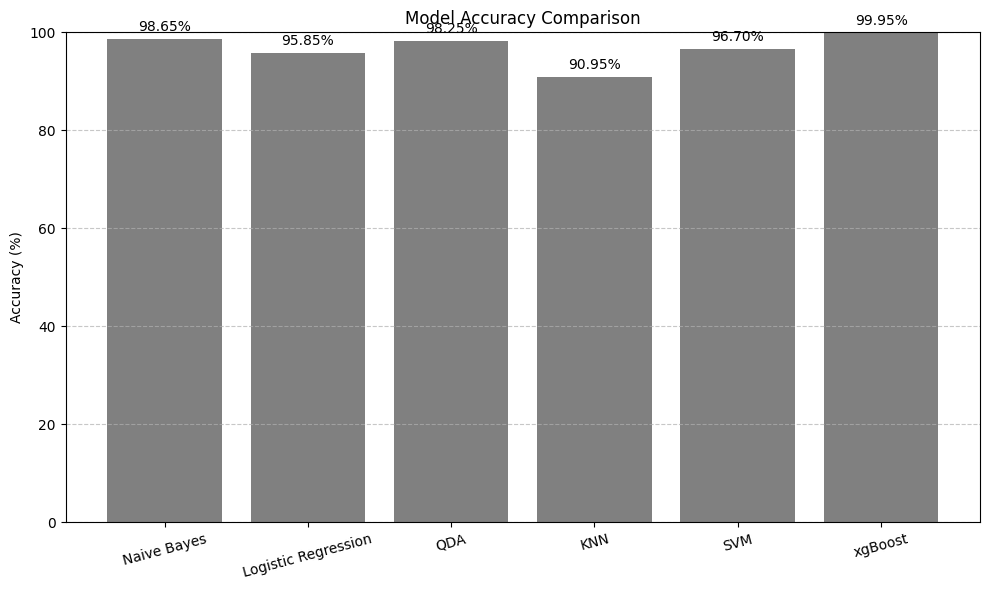

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

model_names = ['Naive Bayes', 'Logistic Regression', 'QDA', 'KNN', 'SVM', 'xgBoost']
accuracies = [
    accuracy_score(y_test, y_pred_gnb) * 100,      # Naive Bayes
    accuracy_score(y_test, y_pred) * 100,      # Logistic Regression
    accuracy_score(y_test, y_pred_qda) * 100,     # QDA
    accuracy_score(y_test, y_pred_knn) * 100,     # KNN
    accuracy_score(y_test, y_pred_svm) * 100,       # SVM
    accuracy_score(y_test, y_pred_xgb) * 100# 
]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='grey')
plt.ylim(0, 100)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

# Customize plot
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
